In [1]:


import matplotlib.pyplot as plt
import numpy as np

from sandpile import *
from utils import *
from multiprocessing import Pool, Process, set_start_method
import multiprocessing as mp



In [7]:

def run_system(task):
    dim, grid, boundary, perturbation, crit, time_steps = task
    system = SandpileND(dim, grid, crit, boundary, perturbation)
    system(time_steps)
    system.save_data(f"data_{dim}_{grid}_{boundary[0]}_{perturbation[0]}_{crit}")

N = 1_000_000
tasks = [
    (1, 40, "open", N, "data1"),
    (2, 20, "open", N, "data2"),
    (3, 15, "open", N, "data3"),
    (1, 40, "closed", N, "data1_closed"),
    (2, 20, "closed", N, "data2_closed"),
    (3, 15, "closed", N, "data3_closed"),
]

tasks = [
    (2, 20, "closed", "non conservative", 7, 10_000),
]

ctx = mp.get_context('fork')

with ctx.Pool() as pool:
    pool.map(run_system, tasks)


dim2 grid20 closed non conservative:   0%|          | 0/9999 [00:00<?, ?it/s]

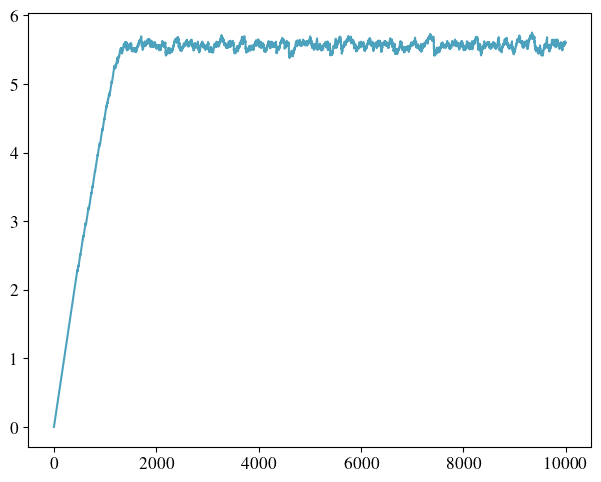

In [8]:
from sandpile import *
import matplotlib.pyplot as plt


plt.figure(1, figsize=(12, 5))

dim = 2
bound = "c"
cons = "n"
grid = 20
plt.subplot(121)
system = SandpileND.load_from_file(f"data_{dim}_{20}_{bound}_{cons}")

plt.plot(range(system.average_slopes.__len__()), system.average_slopes)

# plt.subplot(122)
# system = SandpileND.load_from_file(f"data{dim}_closed")
# 
# plt.plot(range(system.average_slopes.__len__()), system.average_slopes)




In [9]:
data = system.get_avalanche_data()


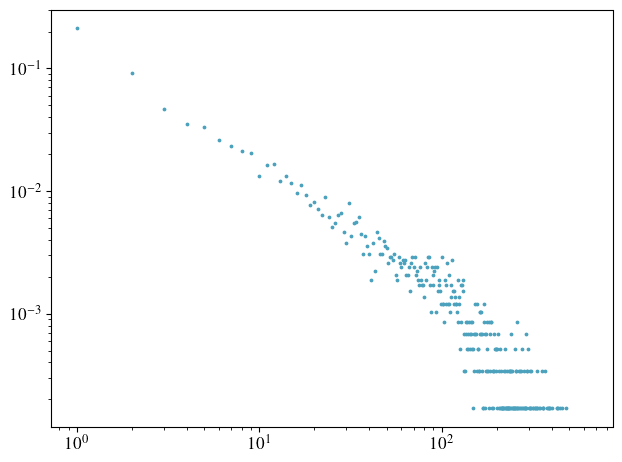

In [10]:
size, time_steps = get_hist(data["size"])

plt.yscale("log")
plt.xscale("log")
plt.scatter(time_steps, size, s=3)